# <center>金融机构客户认购产品意向的预测模型研究

## 1. 初探数据

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # 不输出warning

In [2]:
# 读取数据
train = pd.read_excel('train.xlsx')
train.head()
test = pd.read_csv('test.csv')


In [220]:
# 数据表大小
print('实验数据大小:', train.shape)  # 查看实验数据集数据
print('预测数据大小:', test.shape)  # 查看预测数据集数据
train.info()  # 查看实验数据集的数据缺失情况
train.head()  # 查看数据的具体组成


实验数据大小: (26645, 20)
预测数据大小: (2000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26645 entries, 0 to 26644
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          26645 non-null  int64  
 1   job          26645 non-null  object 
 2   marital      26645 non-null  object 
 3   education    26645 non-null  object 
 4   default      26645 non-null  object 
 5   housing      26645 non-null  object 
 6   loan         26645 non-null  object 
 7   contact      26645 non-null  object 
 8   month        26645 non-null  object 
 9   day_of_week  26645 non-null  object 
 10  campaign     26645 non-null  int64  
 11  passed_days  26645 non-null  int64  
 12  previous     26645 non-null  int64  
 13  pre_outcome  26645 non-null  object 
 14  emp_rate     26645 non-null  float64
 15  cpi          26645 non-null  float64
 16  cci          26645 non-null  float64
 17  r3m          26645 non-null  float64
 18  employe

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,passed_days,previous,pre_outcome,emp_rate,cpi,cci,r3m,employed,y
0,27,admin.,single,university.degree,no,no,no,cellular,mar,tue,1,999,0,nonexistent,-1.8,93.369,-34.8,0.637,5008.7,yes
1,55,unemployed,married,basic.9y,no,no,yes,cellular,may,mon,1,999,0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,yes
2,25,blue-collar,single,basic.9y,no,yes,no,cellular,may,fri,3,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,yes
3,43,admin.,married,university.degree,unknown,yes,no,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,yes
4,33,admin.,married,high.school,no,no,no,telephone,jul,tue,1,999,0,nonexistent,-2.9,92.469,-33.6,1.044,5076.2,yes


In [3]:
# 删除重复值
train.drop_duplicates(inplace=True)


In [5]:
# 检查是否有缺失值
train.info()
train.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25860 entries, 0 to 26644
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          25860 non-null  int64  
 1   job          25860 non-null  object 
 2   marital      25860 non-null  object 
 3   education    25860 non-null  object 
 4   default      25860 non-null  object 
 5   housing      25860 non-null  object 
 6   loan         25860 non-null  object 
 7   contact      25860 non-null  object 
 8   month        25860 non-null  object 
 9   day_of_week  25860 non-null  object 
 10  campaign     25860 non-null  int64  
 11  passed_days  25860 non-null  int64  
 12  previous     25860 non-null  int64  
 13  pre_outcome  25860 non-null  object 
 14  emp_rate     25860 non-null  float64
 15  cpi          25860 non-null  float64
 16  cci          25860 non-null  float64
 17  r3m          25860 non-null  float64
 18  employed     25860 non-null  float64
 19  y   

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
campaign       0
passed_days    0
previous       0
pre_outcome    0
emp_rate       0
cpi            0
cci            0
r3m            0
employed       0
y              0
dtype: int64

In [6]:
# 数值型指标描述
train.describe()


,age,campaign,passed_days,previous,emp_rate,cpi,cci,r3m,employed
count,25860.000000,25860.000000,25860.000000,25860.000000,25860.000000,25860.000000,25860.000000,25860.000000,25860.000000
mean,40.060789,2.594548,961.789134,0.173395,0.069927,93.575922,-40.479973,3.609769,5166.402688
std,10.442839,2.804839,188.599531,0.494077,1.578380,0.582778,4.645472,1.739875,72.569100
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# 非数值型指标描述
train.describe(include='O')


,job,marital,education,default,housing,loan,contact,month,day_of_week,pre_outcome,y
count,25860,25860,25860,25860,25860,25860,25860,25860,25860,25860,25860
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,6453,15688,7595,20462,13518,21195,16277,8685,5430,22321,22829


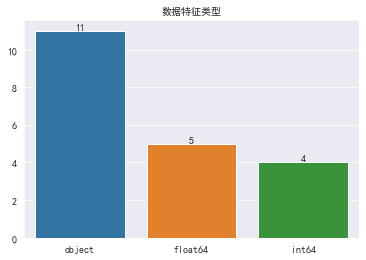

In [163]:
sns.set_style('darkgrid')  # 设置背景风格为暗
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使图片中的中文正常显示
plt.rcParams['axes.unicode_minus'] = False  # 使图片中的负号正常显示
ax = sns.barplot(x=train.dtypes.value_counts().index,
                 y=train.dtypes.value_counts()[[0, 1, 2]])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("数据特征类型", fontsize=10)
plt.savefig('特征变量类型统计', bbox_inches='tight')


图 1 数据特征类型

In [5]:
train.reset_index(drop=True, inplace=True)  # 重设索引


no     22829
yes     3031
Name: y, dtype: int64

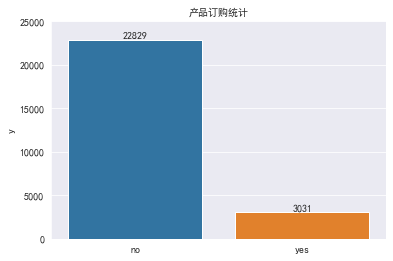

In [164]:
ax = sns.barplot(x=train['y'].value_counts().index,
                 y=train['y'].value_counts()[[0, 1]])
for bars in ax.containers:
    ax.bar_label(bars)
plt.yticks(range(0, 26000, 5000))
plt.title("产品订购统计", fontsize=10)
plt.savefig('产品订购统计', bbox_inches='tight')
train['y'].value_counts()


图 2 产品订购情况统计

## 2. 探索性分析

In [6]:
y_map = {'yes': 1, 'no': 0}
train['y'] = train['y'].map(y_map)  # 将yes和no用1，0代替


In [8]:
# 将两个数据集进行合并
data = pd.concat([train, test], axis=0, ignore_index=True)
data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,passed_days,previous,pre_outcome,emp_rate,cpi,cci,r3m,employed,y
0,27,admin.,single,university.degree,no,no,no,cellular,mar,tue,1,999,0,nonexistent,-1.8,93.369,-34.8,0.637,5008.7,1.0
1,55,unemployed,married,basic.9y,no,no,yes,cellular,may,mon,1,999,0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,1.0
2,25,blue-collar,single,basic.9y,no,yes,no,cellular,may,fri,3,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,1.0
3,43,admin.,married,university.degree,unknown,yes,no,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,1.0
4,33,admin.,married,high.school,no,no,no,telephone,jul,tue,1,999,0,nonexistent,-2.9,92.469,-33.6,1.044,5076.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27855,34,technician,single,professional.course,no,no,no,telephone,jun,thu,8,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,NaN
27856,34,management,married,university.degree,no,no,no,cellular,aug,thu,1,999,0,nonexistent,-2.9,92.201,-31.4,0.873,5076.2,NaN
27857,25,blue-collar,married,basic.9y,unknown,yes,no,cellular,jul,thu,12,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,NaN
27858,30,technician,single,professional.course,no,yes,no,cellular,aug,tue,6,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,NaN


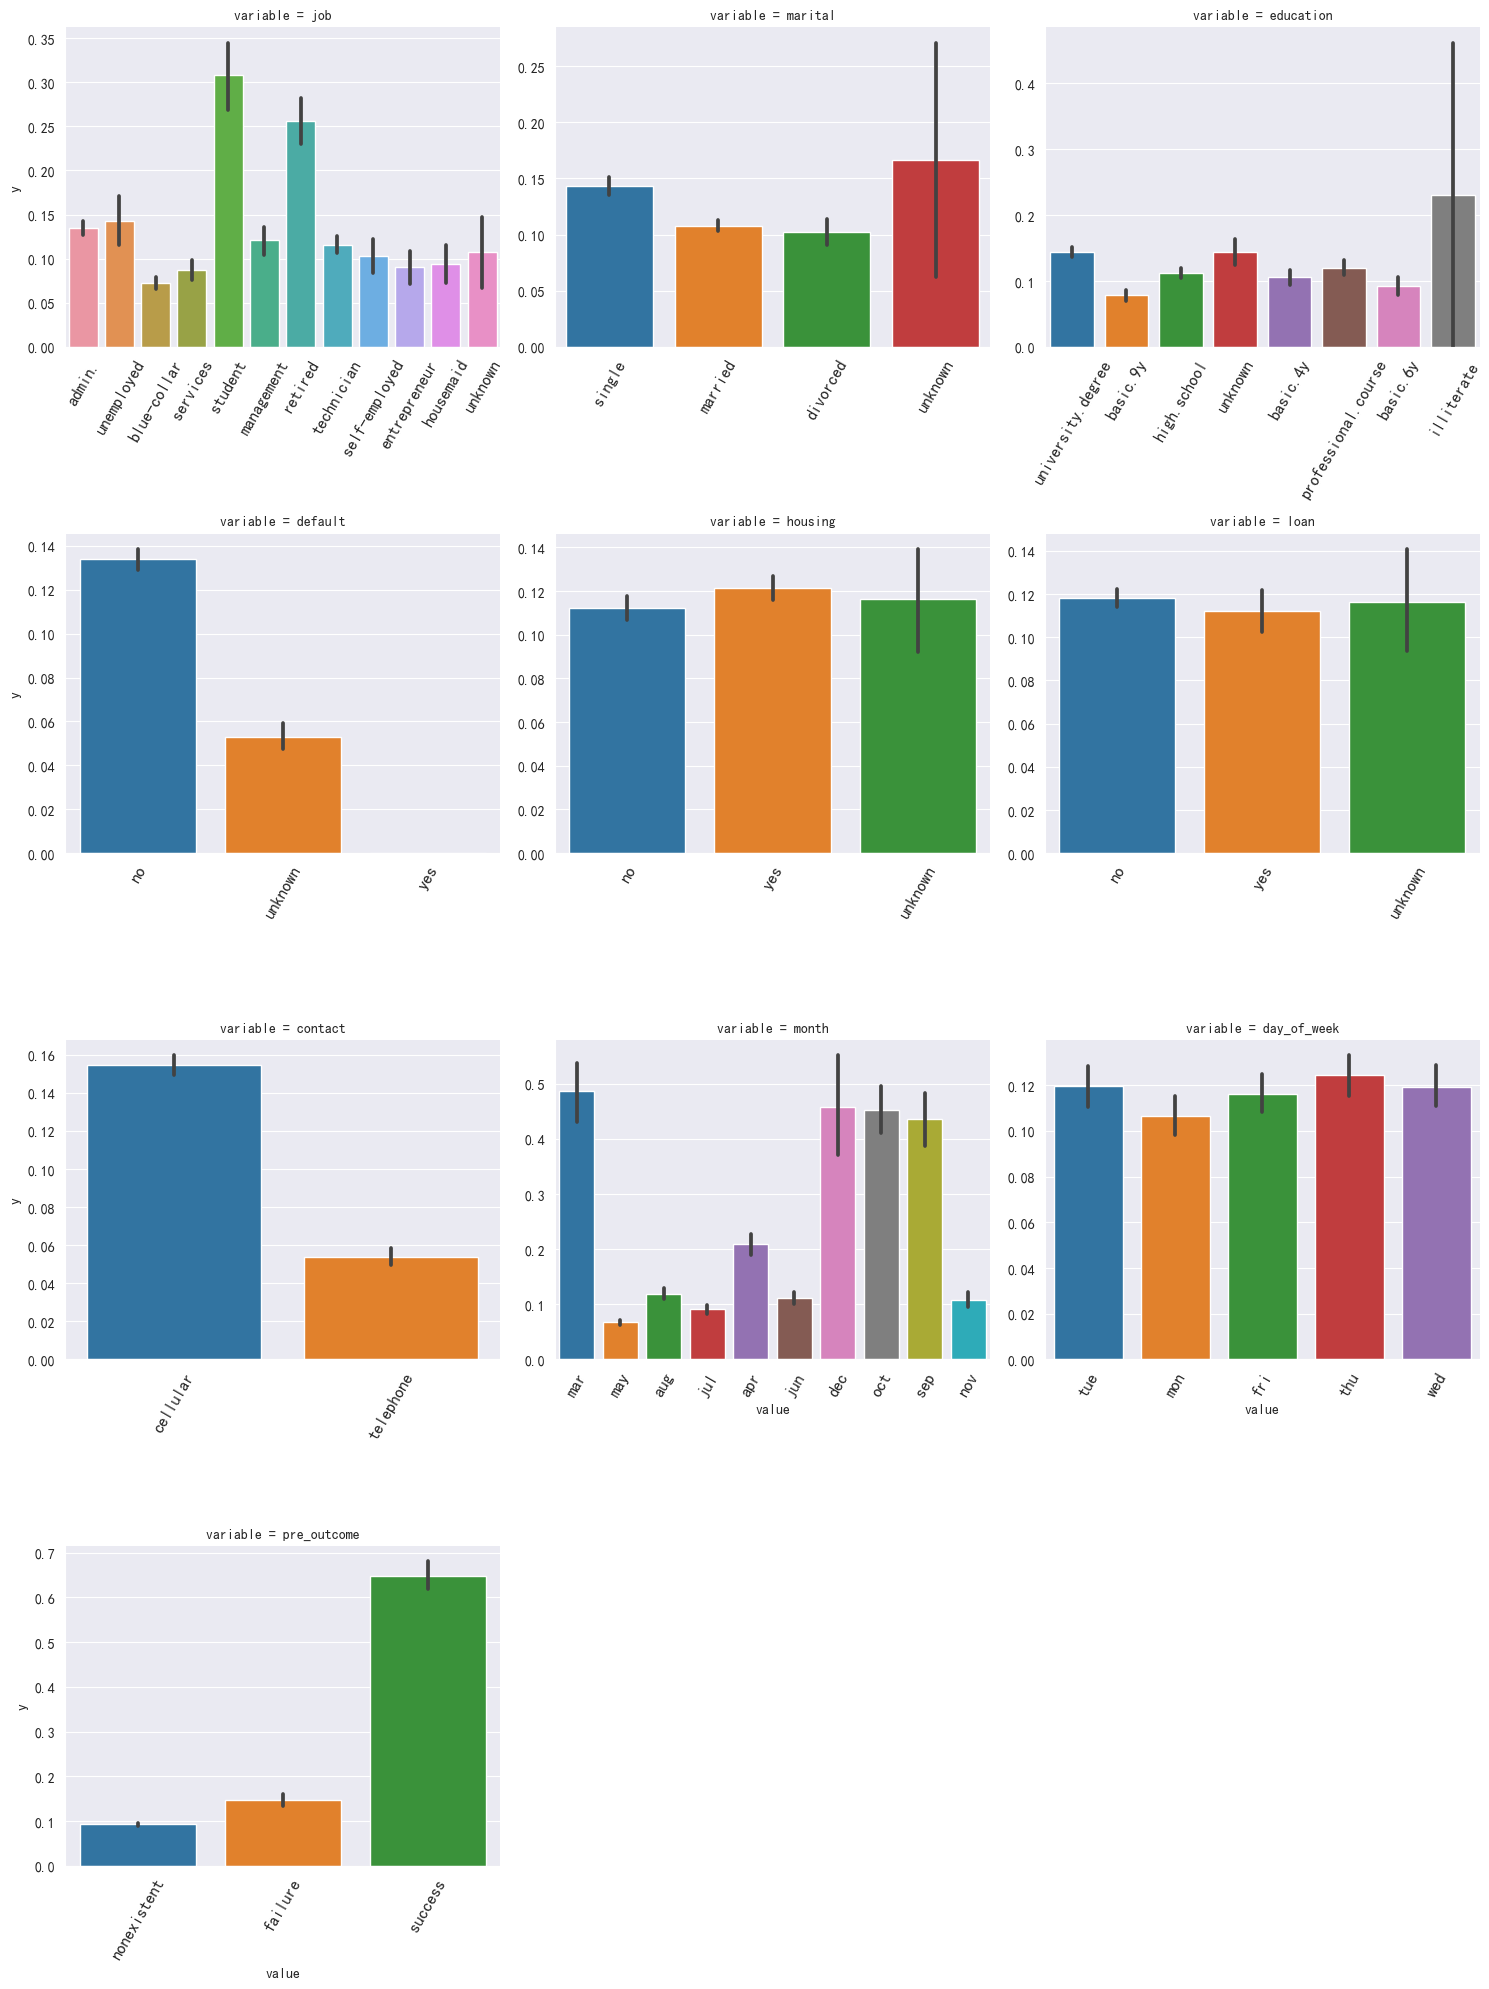

In [9]:
# 离散变量列名
object_columns = list(train.select_dtypes(include=['object']).columns)
# 绘制离散型变量关于是否购买产品的关系图


def barplot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x = plt.xticks(rotation=60, fontsize=12)


f = pd.melt(train,  value_vars=object_columns, id_vars='y')
g = sns.FacetGrid(f, col="variable", col_wrap=3,
                  sharex=False, sharey=False, size=5)
g = g.map(barplot, "value", 'y')
plt.savefig('非数值型特征分布', bbox_inches='tight')


<center>图 3 非数值型特征探索分析

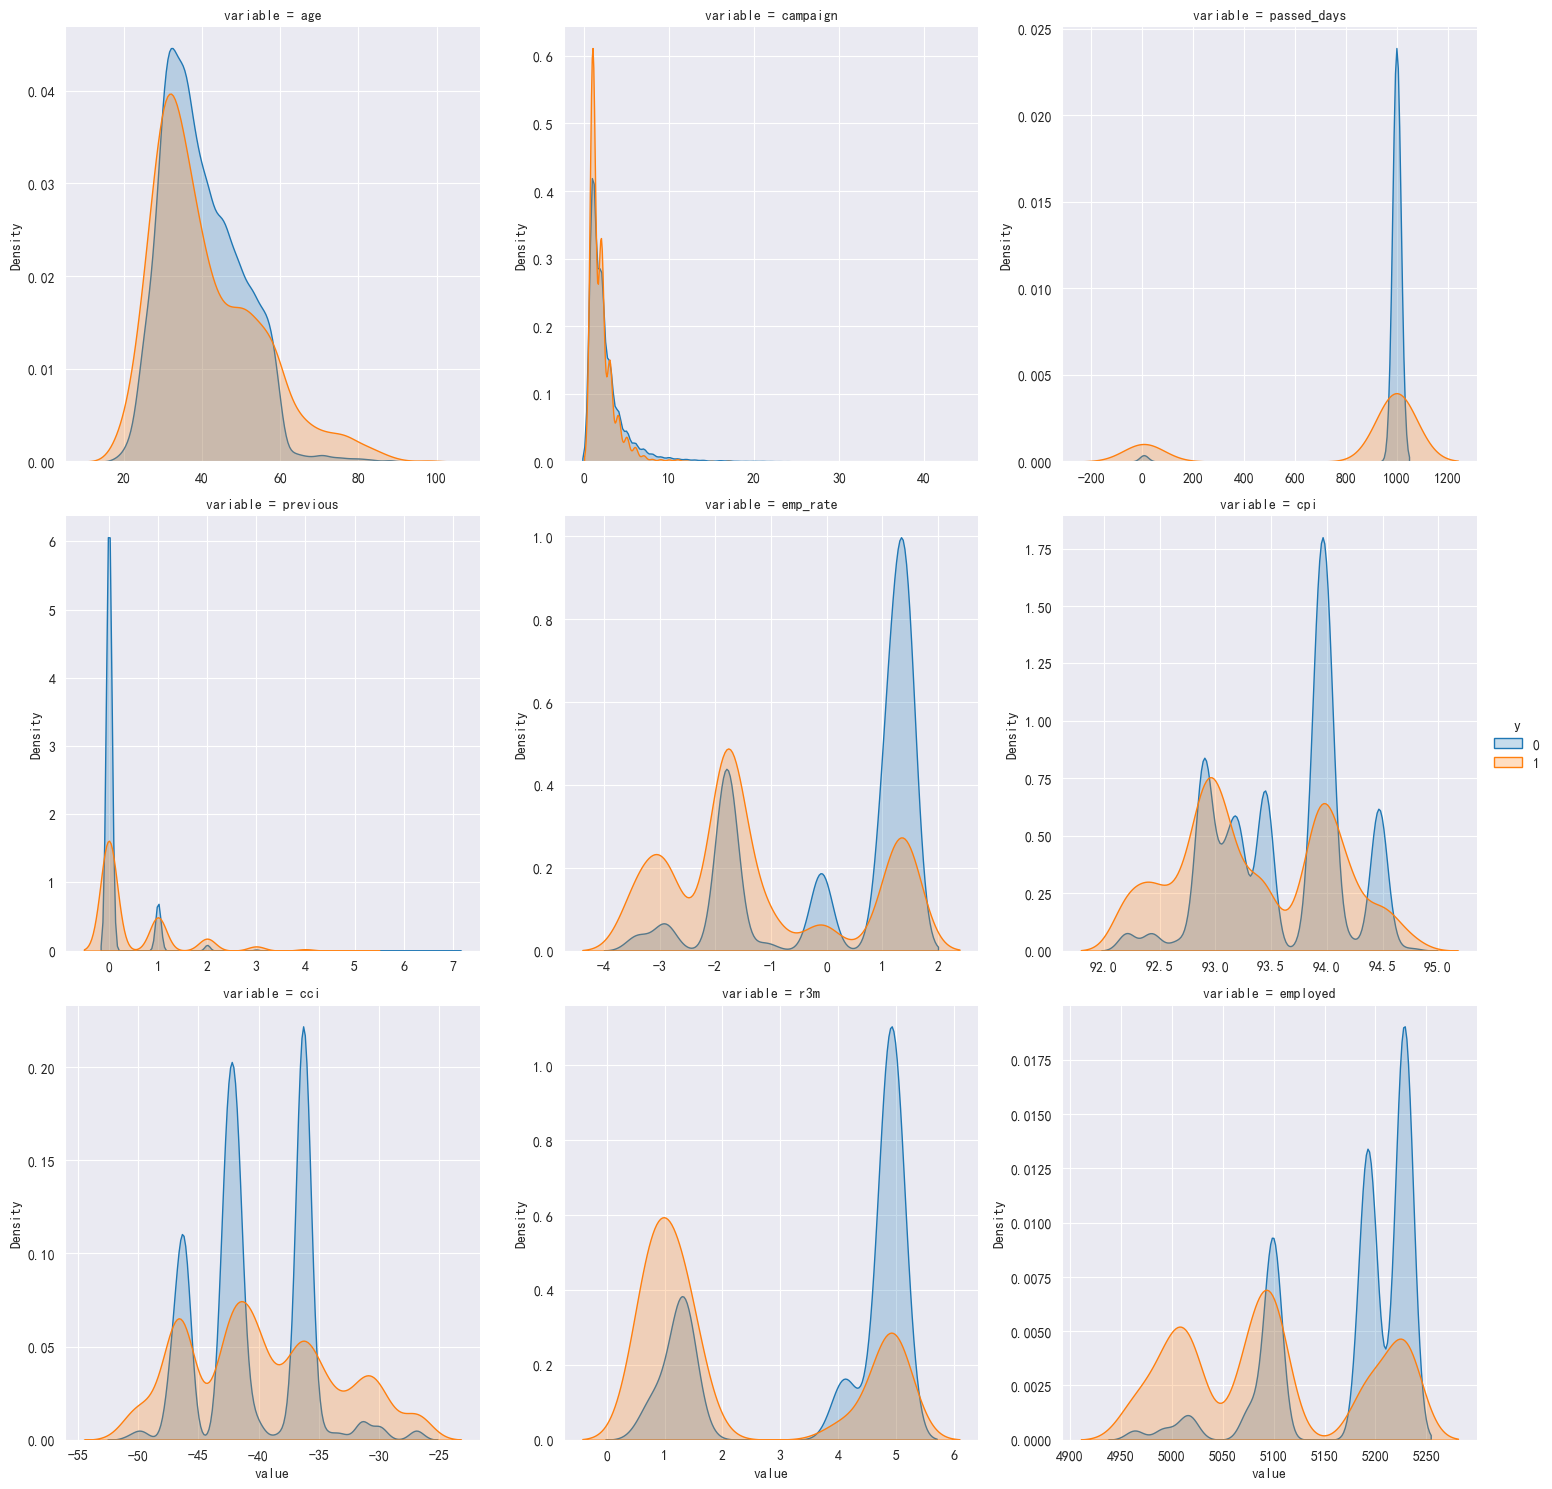

In [10]:
num_columns = ['age', 'campaign', 'passed_days',
               'previous', 'emp_rate', 'cpi', 'cci', 'r3m', 'employed']
f = pd.melt(train,  value_vars=num_columns, id_vars='y')
g = sns.FacetGrid(f, col="variable", col_wrap=3,
                  sharex=False, sharey=False, size=5, hue='y')
g = g.map(sns.kdeplot, "value", shade=True)
g.add_legend()
plt.savefig('数值型特征分布', bbox_inches='tight')


<center>图 4 数值型特征探索分析

## 3. 特征工程

### 3.1 特征构造

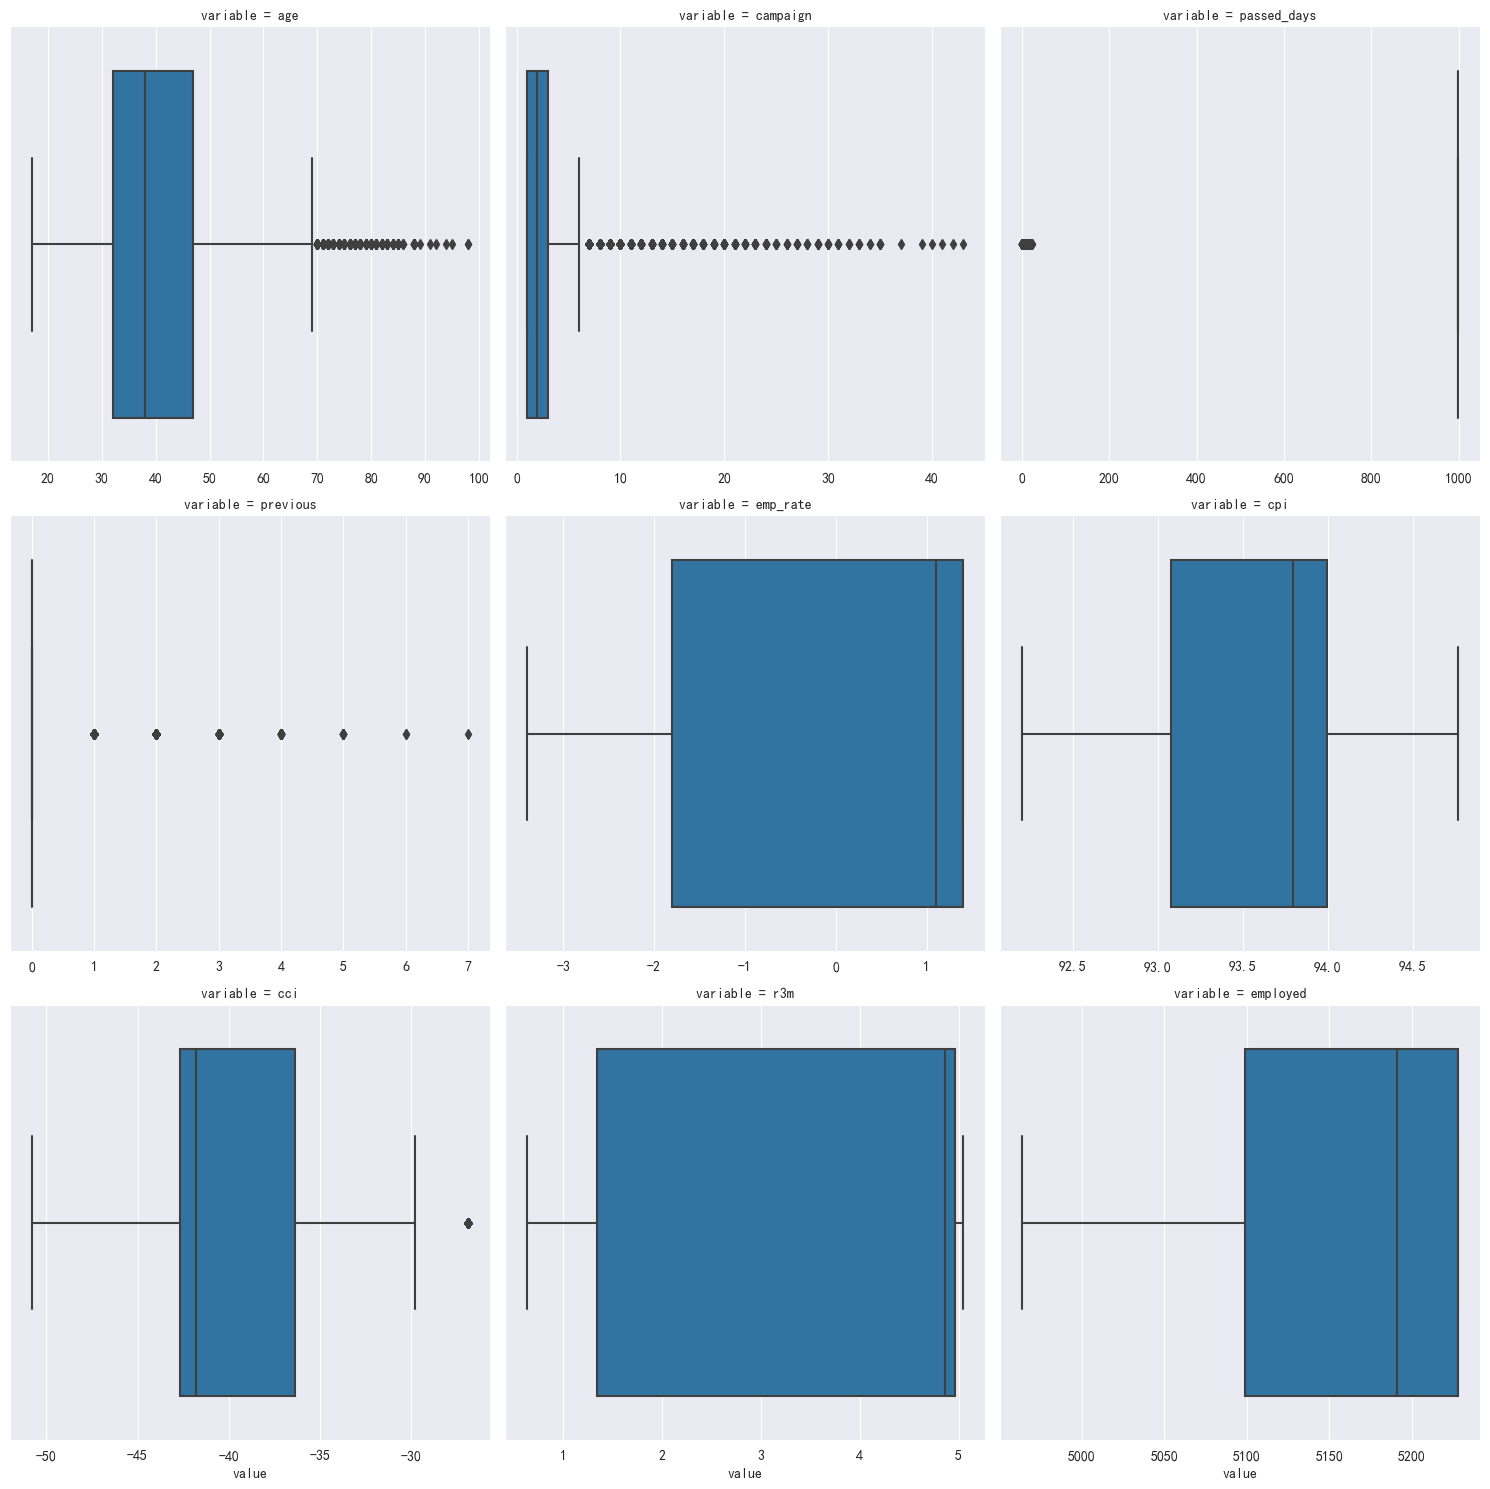

In [11]:
# 数据的分布情况
categorical_features = ['age', 'campaign', 'passed_days',
                        'previous', 'emp_rate', 'cpi', 'cci', 'r3m', 'employed']
f = pd.melt(train, value_vars=categorical_features, id_vars=['y'])
g = sns.FacetGrid(f, col="variable",  col_wrap=3,
                  sharex=False, sharey=False, size=5)
g = g.map(sns.boxplot, "value")
plt.savefig('数值型特征分布情况', bbox_inches='tight')


<center>图 5 数值型数据分布情况

In [12]:
# 计算IV值
def CalcWOE(df, col, target):
    total = df.groupby([col])[target].count()
    total = pd.DataFrame({'total': total})
    bad = df.groupby([col])[target].count() - df.groupby([col])[target].sum()
    bad = pd.DataFrame({'bad': bad})
    regroup = total.merge(bad, left_index=True, right_index=True, how='left')
    regroup.reset_index(level=0, inplace=True)
    N = sum(regroup['total'])
    B = sum(regroup['bad'])
    regroup['good'] = regroup['total'] - regroup['bad']
    G = N - B
    regroup['bad_pcnt'] = regroup['bad'].map(lambda x: x * 1.0 / B)
    regroup['good_pcnt'] = regroup['good'].map(lambda x: x * 1.0 / G)
    regroup['WOE'] = regroup.apply(
        lambda x: np.log(x.good_pcnt * 1.0 / x.bad_pcnt), axis=1)
    WOE_dict = regroup[[col, 'WOE']].set_index(col).to_dict(orient='index')
    IV = regroup.apply(
        lambda x:
        (x.good_pcnt - x.bad_pcnt) * np.log(x.good_pcnt * 1.0 / x.bad_pcnt),
        axis=1)
    IV_SUM = sum(IV)
    return {'WOE': WOE_dict, 'IV_sum': IV_SUM, 'IV': IV}


# 判断woe是否满足单调性
def BadRateMonotone(df, sortByVar, target):
    df2 = df.sort_values(by=[sortByVar])
    total = df2.groupby([sortByVar])[target].count()
    total = pd.DataFrame({'total': total})
    bad = df2.groupby([sortByVar])[target].count() - df2.groupby(
        [sortByVar])[target].sum()
    bad = pd.DataFrame({'bad': bad})
    regroup = total.merge(bad, left_index=True, right_index=True, how='left')
    regroup.reset_index(level=0, inplace=True)
    combined = zip(regroup['total'], regroup['bad'])
    badRate = [x[1] * 1.0 / x[0] for x in combined]
    badRateMonotone = [
        badRate[i] < badRate[i + 1] for i in range(len(badRate) - 1)
    ]
    Monotone = len(set(badRateMonotone))
    if Monotone == 1:
        return True
    else:
        return False


根据IV值和WOE单调性实现分箱

### 3.1.1 campaign特征处理

In [13]:
train['campaign_bin'] = pd.cut(train['campaign'], [0, 2, 6, 12, 15, 90])
WOE_IV = CalcWOE(train, 'campaign_bin', 'y')
T_F = BadRateMonotone(train, 'campaign_bin', 'y')
print(WOE_IV['IV_sum'], T_F)


0.08036179288007364 True


campaign_bin
(0, 2]      0.130759
(2, 6]      0.099111
(6, 12]     0.049479
(12, 15]    0.028777
(15, 90]    0.008439
Name: y, dtype: float64

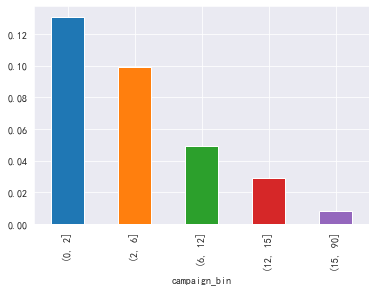

In [227]:
import matplotlib.colors as mcolors  # 导入colors库进行颜色配置
colors = list(mcolors.TABLEAU_COLORS.keys())  # 颜色变化
by_campaign = train.groupby('campaign_bin')['y'].mean()  # 计算不同类别的购买比例
by_campaign.plot(kind='bar', color=colors)
plt.savefig('campaign特征处理', bbox_inches='tight')
by_campaign


图6 campaign特征处理情况

### 3.1.2 age特征处理

In [14]:
train['age_bin'] = pd.cut(train['age'].astype(int), [0, 30, 60, 100])
WOE_IV = CalcWOE(train, 'age_bin', 'y')
T_F = BadRateMonotone(train, 'age_bin', 'y')
print(WOE_IV['IV_sum'], T_F)


0.18181717074100623 False


age_bin
(0, 30]      0.155638
(30, 60]     0.099178
(60, 100]    0.452218
Name: y, dtype: float64

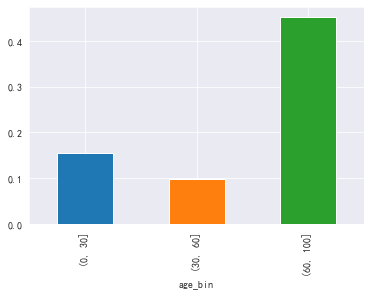

In [229]:
by_age = train.groupby('age_bin')['y'].mean()
by_age.plot(kind='bar', color=colors)  # 绘制四个年龄分布的生存情况
plt.savefig('age字段处理结果', bbox_inches='tight')
by_age


图7 age字段处理结果

### 3.1.3 previous字段处理

In [15]:
train['previous_bin'] = pd.cut(train['previous'], [-1, 0.5, 10])
WOE_IV = CalcWOE(train, 'previous_bin', 'y')
T_F = BadRateMonotone(train, 'previous_bin', 'y')
print(WOE_IV['IV_sum'], T_F)


0.2658868267456822 True


previous_bin
(-1.0, 0.5]    0.092648
(0.5, 10.0]    0.272111
Name: y, dtype: float64

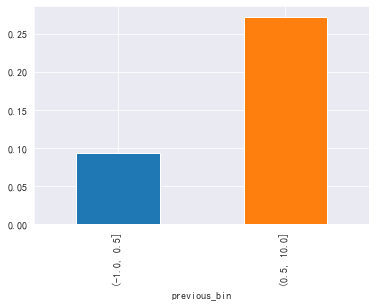

In [231]:
by_previous = train.groupby('previous_bin')['y'].mean()
by_previous.plot(kind='bar', color=colors)  # 绘制四个年龄分布的生存情况
plt.savefig('previous字段处理结果', bbox_inches='tight')
by_previous


图 8 previous字段处理结果

### 3.1.4 passed_days字段处理

In [16]:
train['passed_days_bin'] = pd.cut(train['passed_days'], 2)
WOE_IV = CalcWOE(train, 'passed_days_bin', 'y')
T_F = BadRateMonotone(train, 'passed_days_bin', 'y')
print(WOE_IV['IV_sum'], T_F)


0.5253823734858649 True


passed_days_bin
(-0.999, 499.5]    0.636739
(499.5, 999.0]     0.096983
Name: y, dtype: float64

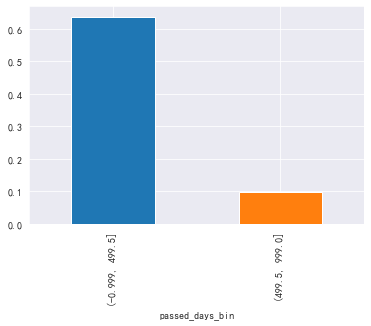

In [233]:
by_passed_days = train.groupby('passed_days_bin')['y'].mean()
by_passed_days.plot(kind='bar', color=colors)  # 绘制四个年龄分布的生存情况
plt.savefig('passed_days字段处理结果', bbox_inches='tight')
by_passed_days


图 9 passed_days字段处理结果

### 3.1.5 month特征处理

In [17]:
def quarter(data):
    a = ''
    if data in ['jan', 'feb', 'mar']:
        a = 'Q1'
    elif data in ['apr', 'may', 'jun']:
        a = 'Q2'
    elif data in ['jul', 'aug', 'sep']:
        a = 'Q3'
    else:
        a = 'Q4'
    return a


def halfyear(data):
    a = ''
    if data in ['jan', 'feb', 'mar', 'apr', 'may', 'jun']:
        a = 'H1'
    else:
        a = 'H2'
    return a


# 构造季度和半年两个新特征
train['quarter'] = train['month'].map(quarter)
train['halfyear'] = train['month'].map(halfyear)


### 3.1.6 all_previous字段处理

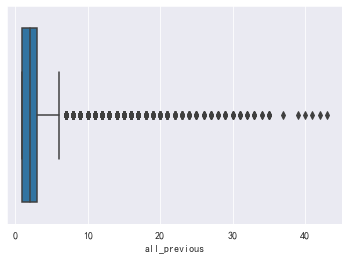

In [235]:
train['all_previous'] = train['campaign'] + train['previous']
sns.boxplot(x='all_previous', data=train)
plt.savefig('all_previous数据分布', bbox_inches='tight')


图 10（左）all_previous数据分布

Text(23.53825231481482, 0.5, 'y')

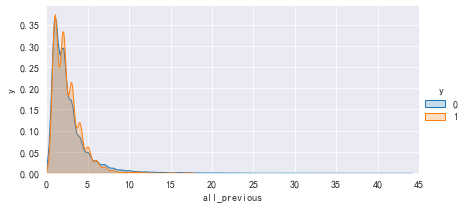

In [236]:
prviousFacet = sns.FacetGrid(train, hue='y', aspect=2)  # 创建坐标轴
prviousFacet.map(sns.kdeplot, 'all_previous',
                 shade=True)  # 绘制关于all_previous的核密度图
prviousFacet.set(xlim=(0, 45))  # 设置坐标轴范围
prviousFacet.add_legend()  # 设置图例
plt.savefig('all_previous分布情况', bbox_inches='tight')
plt.xlabel('all_previous')  # 设置x轴标签
plt.ylabel('y')  # 设置all_previous轴标签


图 10（右）all_previous数据分布

In [19]:
train['all_previous_bin'] = pd.cut(train['all_previous'], [0, 11, 50])
WOE_IV = CalcWOE(train, 'all_previous_bin', 'y')
T_F = BadRateMonotone(train, 'all_previous_bin', 'y')
print(WOE_IV['IV_sum'], T_F)


0.032096721543037755 True


all_previous_bin
(0, 11]     0.118976
(11, 50]    0.019565
Name: y, dtype: float64

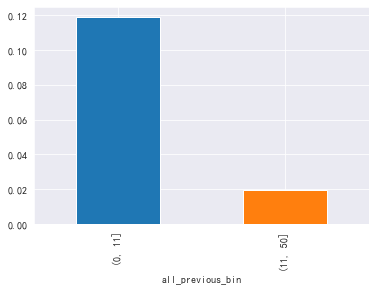

In [238]:
by_all_previous = train.groupby('all_previous_bin')['y'].mean()
by_all_previous.plot(kind='bar', color=colors)  # 绘制四个年龄分布的生存情况
plt.savefig('all_previous特征处理', bbox_inches='tight')
by_all_previous


图 11 all_previous特征处理结果

In [20]:
train.drop(['age', 'all_previous', 'previous', 'campaign',
           'passed_days'], axis=1, inplace=True)  # 删除字段特征


### 3.3 特征筛选

In [21]:
# 如果某一个类别占比超过95%说明这个特征严重偏斜，选择去除该特征
def MaximumBinPcnt(df, col):
    N = df.shape[0]
    total = df.groupby([col])[col].count()
    pcnt = total * 1.0 / N
    return max(pcnt)


for column in train.columns:
    print(column, ':', MaximumBinPcnt(train, column))


job : 0.24953596287703017
marital : 0.6066511987625677
education : 0.2936968290796597
default : 0.7912606341840681
housing : 0.5227378190255221
loan : 0.8196055684454756
contact : 0.6294276875483372
month : 0.33584686774941996
day_of_week : 0.2099767981438515
pre_outcome : 0.8631477184841454
emp_rate : 0.390061871616396
cpi : 0.1905645784996133
cci : 0.1905645784996133
r3m : 0.07080433101314772
employed : 0.390061871616396
y : 0.8827919566898685
campaign_bin : 0.679891724671307
age_bin : 0.7996906419180201
previous_bin : 0.8631477184841454
passed_days_bin : 0.9625290023201856
quarter : 0.5305491105955144
halfyear : 0.5436581593194122
all_previous_bin : 0.9822119102861562


大于0.95的特征只有all_previous_bin和passed_days_bin，删除这两个特征

In [22]:
train.drop(['all_previous_bin', 'passed_days_bin'], axis=1, inplace=True)


In [23]:
data['campaign_bin'] = pd.cut(data['campaign'], [0, 2, 6, 12, 15, 90])
data['age_bin'] = pd.cut(data['age'].astype(int), [0, 30, 60, 100])
data['previous_bin'] = pd.cut(data['previous'], [-1, 0.5, 10])
data['passed_days_bin'] = pd.cut(data['passed_days'], 2)
data['all_previous'] = data['campaign'] + data['previous']
data['all_previous_bin'] = pd.cut(data['all_previous'], [0, 11, 50])
data['quarter'] = data['month'].map(quarter)
data['halfyear'] = data['month'].map(halfyear)
data.drop(['age', 'all_previous', 'previous', 'campaign',
           'passed_days', 'all_previous_bin', 'passed_days_bin'], axis=1, inplace=True)


In [24]:
# 特征化数据
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder()
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
           'day_of_week', 'pre_outcome', 'campaign_bin', 'age_bin', 'previous_bin', 'quarter', 'halfyear']
for feature in columns:
    data[feature] = le_x.fit_transform(data[feature])


In [25]:
train = data[data['y'].notnull()]
train


,job,marital,education,default,housing,loan,contact,month,day_of_week,pre_outcome,...,cpi,cci,r3m,employed,y,campaign_bin,age_bin,previous_bin,quarter,halfyear
0,0,2,6,0,0,0,0,5,3,1,...,93.369,-34.8,0.637,5008.7,1.0,0,0,0,0,0
1,10,1,2,0,0,2,0,6,1,1,...,92.893,-46.2,1.264,5099.1,1.0,0,1,0,1,0
2,1,2,2,0,2,0,0,6,0,0,...,92.893,-46.2,1.250,5099.1,1.0,1,0,1,1,0
3,0,1,6,1,2,0,0,1,3,1,...,93.444,-36.1,4.968,5228.1,1.0,0,1,0,2,1
4,0,1,3,0,0,0,1,3,3,1,...,92.469,-33.6,1.044,5076.2,1.0,0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25855,0,1,3,0,2,2,1,4,2,1,...,94.465,-41.8,4.866,5228.1,0.0,1,1,0,1,0
25856,1,2,1,0,0,0,0,7,2,0,...,93.200,-42.0,4.076,5195.8,0.0,0,1,1,3,1
25857,3,1,0,1,2,0,1,1,2,1,...,93.444,-36.1,4.962,5228.1,0.0,2,1,0,2,1
25858,7,1,3,1,2,0,0,0,4,1,...,93.075,-47.1,1.445,5099.1,0.0,0,1,0,1,0


In [26]:
# 特征卡方检验P值显著小于0.01，则保留特征
from scipy.stats import chi2_contingency
columns_train_data_x = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
                        'month', 'day_of_week', 'pre_outcome', 'emp_rate', 'cpi', 'cci', 'r3m',
                        'employed', 'campaign_bin', 'age_bin', 'previous_bin', 'quarter',
                        'halfyear']
for col in columns_train_data_x:
    obs = pd.crosstab(train['y'],
                      train[col],
                      rownames=['y'],
                      colnames=[col])
    chi2, p, dof, expect = chi2_contingency(obs)
    print("{} 卡方检验p值: {:.4f}".format(col, p))


job 卡方检验p值: 0.0000
marital 卡方检验p值: 0.0000
education 卡方检验p值: 0.0000
default 卡方检验p值: 0.0000
housing 卡方检验p值: 0.0727
loan 卡方检验p值: 0.5202
contact 卡方检验p值: 0.0000
month 卡方检验p值: 0.0000
day_of_week 卡方检验p值: 0.0591
pre_outcome 卡方检验p值: 0.0000
emp_rate 卡方检验p值: 0.0000
cpi 卡方检验p值: 0.0000
cci 卡方检验p值: 0.0000
r3m 卡方检验p值: 0.0000
employed 卡方检验p值: 0.0000
campaign_bin 卡方检验p值: 0.0000
age_bin 卡方检验p值: 0.0000
previous_bin 卡方检验p值: 0.0000
quarter 卡方检验p值: 0.0000
halfyear 卡方检验p值: 0.0000


删除p值大于0.01的特征，即loan，day_of_week，housing

In [27]:
data.drop(['loan', 'day_of_week', 'housing'], axis=1, inplace=True)


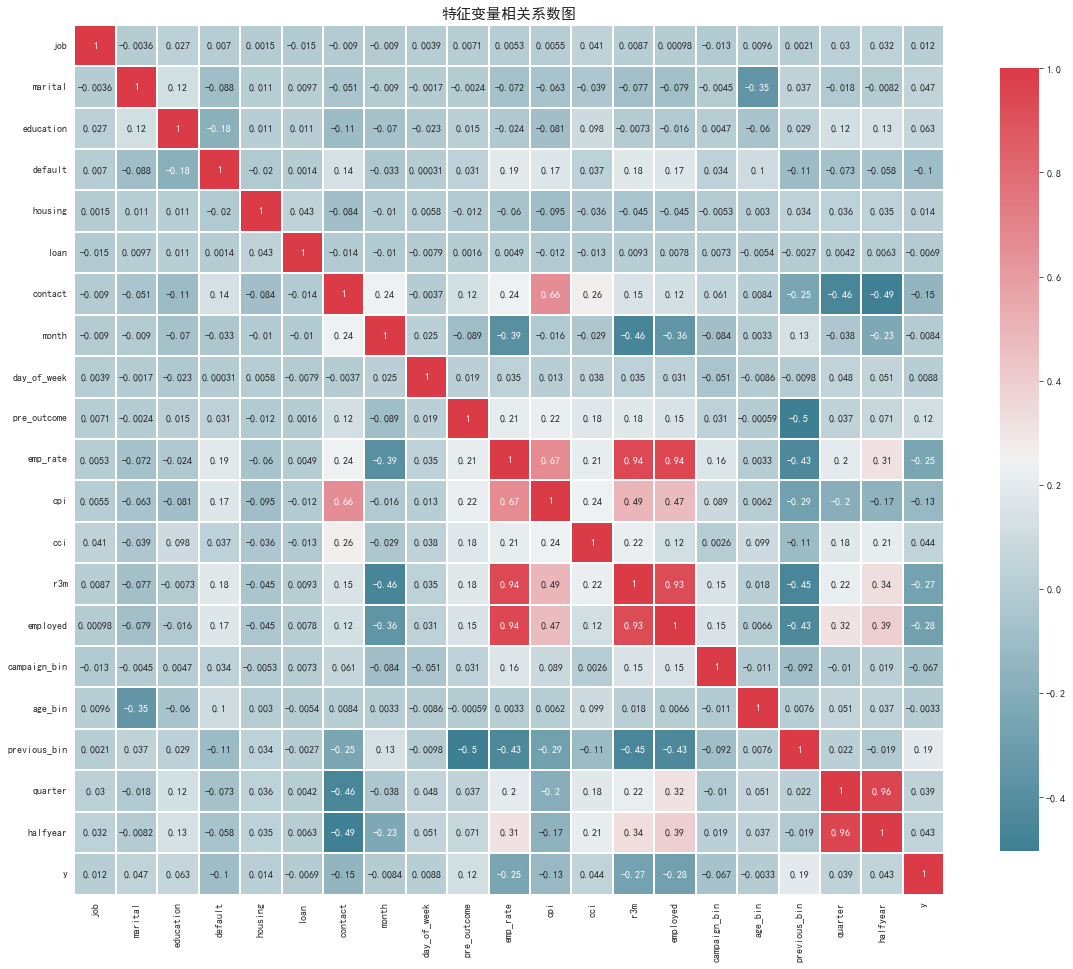

In [247]:
# 使用皮尔逊系数进行相关性检验
def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(20, 16))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    _ = sns.heatmap(
        df.corr('spearman'),
        cmap=colormap,
        square=True,
        cbar_kws={'shrink': .9},
        ax=ax,
        annot=True,
        linewidths=0.1, vmax=1.0, linecolor='white',
        annot_kws={'fontsize': 10}
    )

    plt.title('特征变量相关系数图', size=15)


columns_train_data_xy = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
                         'month', 'day_of_week', 'pre_outcome', 'emp_rate', 'cpi', 'cci', 'r3m',
                         'employed', 'campaign_bin', 'age_bin', 'previous_bin', 'quarter',
                         'halfyear', 'y']
correlation_heatmap(train[columns_train_data_xy])
plt.savefig('特征变量相关系数图', bbox_inches='tight')


<center>图 12 特征变量相关系数图

In [28]:
data.drop(['quarter', 'r3m', 'emp_rate'], axis=1, inplace=True)


删除高度线性相关的特征，保留halfyear，employed

In [29]:
train = data[data['y'].notnull()]
train['y'] = train['y'].astype('int')  # 将目标值转化为整数型


## 4。 模型建立及参数调整

In [30]:
# 数据one-hot编码处理
columns_train_data_x = [
    'job', 'marital', 'education', 'default', 'pre_outcome', 'campaign_bin',
    'age_bin', 'month']
data_x = pd.get_dummies(data, columns=columns_train_data_x)
train_data_y = train['y']
train_data_x = data_x.iloc[:25860, :]
train_data_x.drop('y', axis=1, inplace=True)


In [31]:
from sklearn import ensemble
from sklearn import model_selection
from sklearn import multiclass
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier  # 导入集成学习方法库
from sklearn.linear_model import LogisticRegression  # 调用Logistic Regression库
from sklearn.neighbors import KNeighborsClassifier  # 调用KNeighborsClassifier库
from lightgbm.sklearn import LGBMClassifier
# 对样本过采样
train_data_x, train_data_y = SMOTE().fit_resample(train_data_x, train_data_y)
# 数据标准化
ss = StandardScaler()
train_data_x = ss.fit_transform(train_data_x)
train_data_y.value_counts()


1    22829
0    22829
Name: y, dtype: int64

### 4.1 GBDT模型求解

In [45]:
GBDT_n_estimators = list(range(100, 1100, 100))
GBDT_learning_rate = [0.001, 0.01, 0.1]
GBDT_max_features = ['sqrt']
GBDT_max_depth = list(range(1, 9))

param_grid = {
    'n_estimators': GBDT_n_estimators,
    'learning_rate': GBDT_learning_rate,
    'max_features': GBDT_max_features,
    'max_depth': GBDT_max_depth,
}
cv_split = model_selection.ShuffleSplit(n_splits=10,
                                        test_size=.3,
                                        random_state=5)
model_tunning = GridSearchCV(ensemble.GradientBoostingClassifier(),
                             param_grid=param_grid,
                             cv=cv_split,
                             scoring='roc_auc')
model_tunning.fit(train_data_x, train_data_y)
print('最优分数', model_tunning.best_score_)  # 模型最高分
print('最优参数', model_tunning.best_params_)  # 最优参数
print('最优模型', model_tunning.best_estimator_)  # 最优模型
best_model = model_tunning.best_estimator_


最优分数 0.9520661301755405
最优参数 {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}
最优模型 GradientBoostingClassifier(max_depth=8, max_features='sqrt', n_estimators=300)


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    train_data_x, train_data_y, train_size=.7, random_state=10)

0.889983939261206
0.8937077078233943
0.8411283250511546
0.8842283168164707


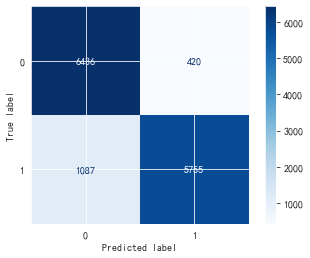

In [252]:
# 混淆矩阵
model = ensemble.GradientBoostingClassifier(n_estimators=300,
                                            learning_rate=0.1,
                                            max_features='sqrt',
                                            max_depth=8,
                                            min_samples_split=500,
                                            min_samples_leaf=60,
                                            subsample=1)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.savefig('GBDT混淆矩阵', bbox_inches='tight')
print(accuracy_score(y_test, y_predict))  # 准确率
print(precision_score(y_test, y_predict, average='weighted'))  # 加权准确率
print(recall_score(y_test, y_predict))  # 召回率
print(f1_score(y_test, y_predict))


表 1 数据和图 13 混淆矩阵

In [253]:
score = cross_val_score(model, train_data_x, train_data_y,
                        cv=5, n_jobs=1, scoring='roc_auc')
score.mean()


0.9473619276219187

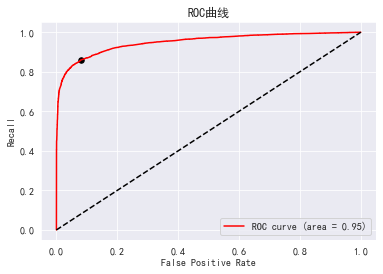

In [255]:
# ROC/AUC
model.fit(x_train, y_train)


def get_rocauc(y, X, clf):
    FPR, recall, thresholds = roc_curve(
        y, clf.predict_proba(X)[:, 1], pos_label=1)
    area = roc_auc_score(y, clf.predict_proba(X)[:, 1])

    maxindex = (recall-FPR).tolist().index(max(recall-FPR))
    threshold = thresholds[maxindex]

    plt.figure()
    plt.plot(FPR, recall, color='red', label='ROC curve (area = %0.2f)' % area)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.scatter(FPR[maxindex], recall[maxindex], c='black', s=30)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('Recall')
    plt.title('ROC曲线')
    plt.legend(loc='lower right')
    plt.savefig('ROC曲线', bbox_inches='tight')
    plt.show()
    return threshold


threshold = get_rocauc(y_test, x_test, model)


图 13 ROC曲线

### 4.2 Logistic Regression模型求解

0.8818075631479048
0.8878094190642339
0.8193510669394913
0.8738212142467461


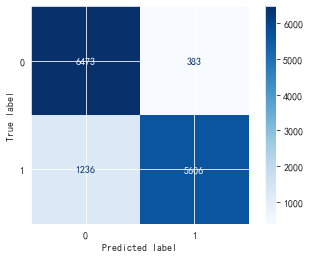

In [275]:
# 建立Logistic Regression模型
logreg = LogisticRegression(penalty="l2", solver="liblinear",)
logreg.fit(x_train, y_train)  # 运用实验集训练模型
log_score = logreg.score(x_train, y_train)  # 计算模型预测准确率
y_predict = logreg.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.savefig('Logistic混淆矩阵', bbox_inches='tight')
print(accuracy_score(y_test, y_predict))  # 准确率
print(precision_score(y_test, y_predict, average='weighted'))  # 加权准确率
print(recall_score(y_test, y_predict))  # 召回率
print(f1_score(y_test, y_predict))


表 2 数据和图 14 混淆矩阵

In [270]:
cross_val_score(logreg, x_train, y_train, cv=10,
                scoring='roc_auc').mean()  # 进行10次交叉检验求得平均值


0.9402403655503487

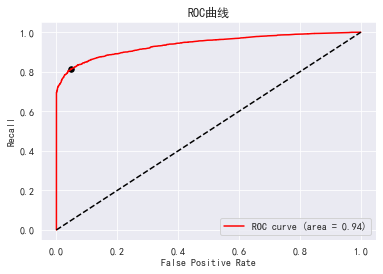

In [276]:
threshold = get_rocauc(y_test, x_test, logreg)


图 14 ROC曲线

### 4.3 K近邻算法求解

0.8640677471163674
0.8641373425899729
0.8569131832797428
0.8629673241095083


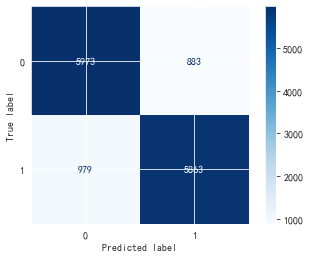

In [308]:
knn = KNeighborsClassifier(weights='distance', n_neighbors=3)  # 初步建立K近邻算法模型
knn.fit(x_train, y_train)  # 运用实验集训练模型
log_score = knn.score(x_train, y_train)  # 计算模型预测准确率
y_predict = knn.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
print(accuracy_score(y_test, y_predict))  # 准确率
print(precision_score(y_test, y_predict, average='weighted'))  # 加权准确率
print(recall_score(y_test, y_predict))  # 召回率
print(f1_score(y_test, y_predict))


In [309]:
cross_val_score(knn, x_train, y_train, cv=10,
                scoring='roc_auc').mean()  # 进行10次交叉检验求得平均值


0.905960393341562

In [273]:
best_score, best_p, best_k = 0, 0, 0  # 建立变量，之后进行赋值输出
# 通过遍历求得最优参数
for k in range(1, 11):
    for p in range(1, 11):
        knn_clf = KNeighborsClassifier(
            weights='distance', n_neighbors=k, p=p)  # 建立相应参数下的模型
        scores = cross_val_score(
            knn_clf, x_train, y_train, cv=10, scoring='roc_auc')  # 训练集进行交叉检验的得分
        score = np.mean(scores)  # 求交叉检验得分的平均数
        if score > best_score:
            best_score, best_p, best_k = score, p, k  # 通过不断对比，选出最高得分下的k和p
print('best k=', best_k)  # 输出在最高得分下的k值
print('best p=', best_p)  # 输出在最高得分下的p值
print('best score=', best_score)  # 输出最高得分


best k= 10
best p= 4
best score= 0.9291563220781885


In [287]:
best_score, best_p, best_k = 0, 0, 0  # 建立变量，之后进行赋值输出
# 通过遍历求得最优参数
for k in range(10, 16):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(
            weights='distance', n_neighbors=k, p=p)  # 建立相应参数下的模型
        scores = cross_val_score(
            knn_clf, x_train, y_train, cv=10, scoring='roc_auc')  # 训练集进行交叉检验的得分
        score = np.mean(scores)  # 求交叉检验得分的平均数
        if score > best_score:
            best_score, best_p, best_k = score, p, k  # 通过不断对比，选出最高得分下的k和p
print('best k=', best_k)  # 输出在最高得分下的k值
print('best p=', best_p)  # 输出在最高得分下的p值
print('best score=', best_score)  # 输出最高得分


best k= 15
best p= 2
best score= 0.9317948876940078


In [290]:
best_score, best_p, best_k = 0, 0, 0  # 建立变量，之后进行赋值输出
# 通过遍历求得最优参数
for k in range(16, 21):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(
            weights='distance', n_neighbors=k, p=p)  # 建立相应参数下的模型
        scores = cross_val_score(
            knn_clf, x_train, y_train, cv=10, scoring='roc_auc')  # 训练集进行交叉检验的得分
        score = np.mean(scores)  # 求交叉检验得分的平均数
        if score > best_score:
            best_score, best_p, best_k = score, p, k  # 通过不断对比，选出最高得分下的k和p
print('best k=', best_k)  # 输出在最高得分下的k值
print('best p=', best_p)  # 输出在最高得分下的p值
print('best score=', best_score)  # 输出最高得分


best k= 20
best p= 2
best score= 0.9325353119587767


0.8728281500949043
0.8732896304664222
0.8550131540485238
0.8704061895551258


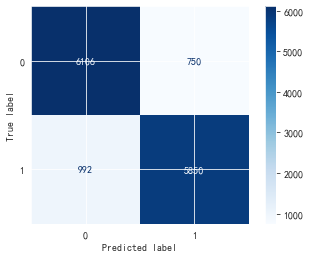

In [313]:
knn = KNeighborsClassifier(
    weights='distance', n_neighbors=18, p=2)  # 初步建立K近邻算法模型
knn.fit(x_train, y_train)  # 运用实验集训练模型
log_score = knn.score(x_train, y_train)  # 计算模型预测准确率
y_predict = knn.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.savefig('Knn混淆矩阵', bbox_inches='tight')
print(accuracy_score(y_test, y_predict))  # 准确率
print(precision_score(y_test, y_predict, average='weighted'))  # 加权准确率
print(recall_score(y_test, y_predict))  # 召回率
print(f1_score(y_test, y_predict))


表 3 数据和图 15 混淆矩阵

In [311]:
cross_val_score(knn, x_train, y_train, cv=10,
                scoring='roc_auc').mean()  # 进行10次交叉检验求得平均值


0.9321704158052938

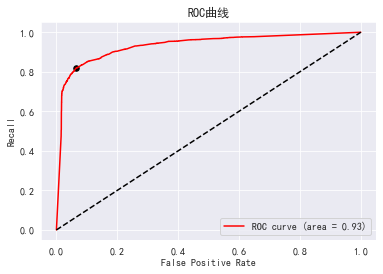

In [314]:
knn.fit(x_train, y_train)
threshold = get_rocauc(y_test, x_test, knn)


图 15 ROC曲线

### 4.4 LightGBM

In [274]:
LGBM_n_estimators = list(range(100, 1100, 100))
LGBM_learning_rate = [0.001, 0.01, 0.05, 0.1]
LGBM_max_depth = list(range(1, 9))

param_grid = {
    'n_estimators': LGBM_n_estimators,
    'learning_rate': LGBM_learning_rate,
    'max_depth': LGBM_max_depth
}
cv_split = model_selection.ShuffleSplit(n_splits=10,
                                        test_size=.3,
                                        random_state=0)
model_tunning = GridSearchCV(LGBMClassifier(),
                             param_grid=param_grid,
                             cv=cv_split,
                             scoring='roc_auc')
model_tunning.fit(train_data_x, train_data_y)
print('最优分数', model_tunning.best_score_)  # 模型最高分
print('最优参数', model_tunning.best_params_)  # 最优参数
print('最优模型', model_tunning.best_estimator_)  # 最优模型
best_model = model_tunning.best_estimator_


最优分数 0.948530377819482
最优参数 {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 600}
最优模型 LGBMClassifier(max_depth=8, n_estimators=600)


0.8912979997079866
0.8944484157180501
0.846389944460684
0.8860836967332263


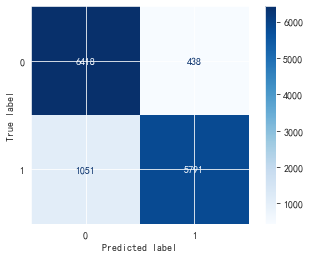

In [363]:
model = LGBMClassifier(n_estimators=1090,
                       learning_rate=0.1,
                       max_depth=8)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.savefig('LightGBM混淆矩阵', bbox_inches='tight')
print(accuracy_score(y_test, y_predict))  # 准确率
print(precision_score(y_test, y_predict, average='weighted'))  # 加权准确率
print(recall_score(y_test, y_predict))  # 召回率
print(f1_score(y_test, y_predict))


表 4 数据和图 16 混淆矩阵

In [354]:
cross_val_score(model, x_train, y_train, cv=10,
                scoring='roc_auc').mean()  # 进行10次交叉检验求得平均值


0.9483543706780132

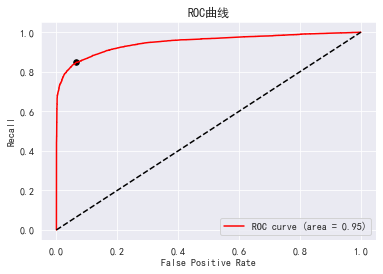

In [364]:
model.fit(x_train, y_train)
threshold = get_rocauc(y_test, x_test, model)


图 16 ROC曲线

### 4.5 Soft Voting

In [38]:
voting_clf = VotingClassifier(estimators=[
    ('logreg_voting', LogisticRegression()),
    ('knn_voting', KNeighborsClassifier(weights='distance', n_neighbors=18, p=2)),
    ('LGBM_voting', LGBMClassifier(n_estimators=1090,
                                   learning_rate=0.1,
                                   max_depth=8,
                                   subsample=1)),
    ('GBDT_voting', ensemble.GradientBoostingClassifier(n_estimators=300,
                                                        learning_rate=0.1,
                                                        max_features='sqrt',
                                                        max_depth=8,
                                                        min_samples_split=500,
                                                        min_samples_leaf=60,
                                                        subsample=1))], voting='soft')  # 运用soft voting对将调整好参数的三个模型进行集成，构造出一个新的模型


0.8961892247043364
0.8999387109546996
0.8475591932183572
0.8907834101382489


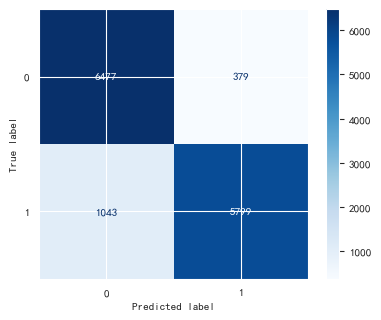

In [95]:
voting_clf.fit(x_train, y_train)
y_predict = voting_clf.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
plt.rcParams['figure.figsize'] = (4.5, 3.5)
plt.rcParams.update({"font.size":8})#此处必须添加此句代码方可改变标题字体大小
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.savefig('Soft Voting混淆矩阵', bbox_inches='tight')
print(accuracy_score(y_test, y_predict))  # 准确率
print(precision_score(y_test, y_predict, average='weighted'))  # 加权准确率
print(recall_score(y_test, y_predict))  # 召回率
print(f1_score(y_test, y_predict))


表 5 数据和图 17 混淆矩阵

In [97]:
cross_val_score(voting_clf, x_train, y_train, cv=10,
                scoring='roc_auc').mean()  # 进行10次交叉检验求得平均值


0.9545852913882478

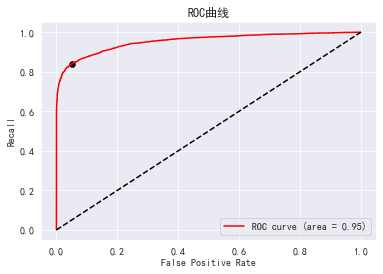

In [427]:
threshold = get_rocauc(y_test, x_test, voting_clf)


图 17 ROC曲线

In [96]:
X_test = data_x.iloc[25860:, :]
X_test.drop('y', axis=1, inplace=True)
X_test = ss.fit_transform(X_test)
predictions = voting_clf.predict(X_test)  # 运用集成模型预测
subbmission = pd.DataFrame({'y': predictions})
y_map = {1: 'yes', 0: 'no'}
subbmission['y'] = subbmission['y'].map(y_map)
subbmission.to_csv('result.csv', columns='y')  # 将结果写入表格
